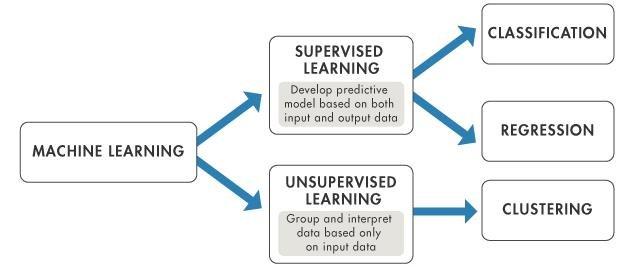

# BUSINESS USE CASE

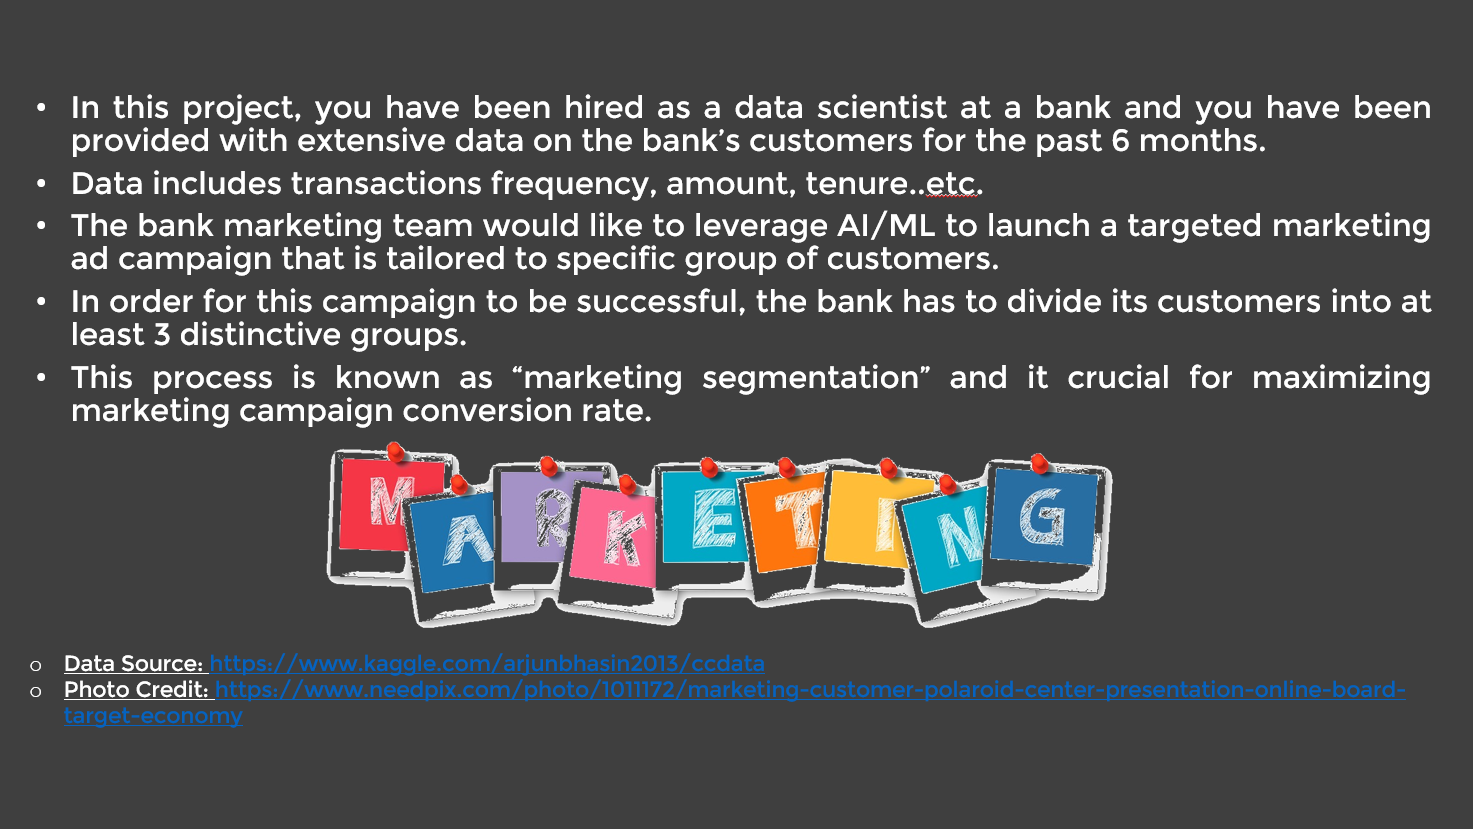

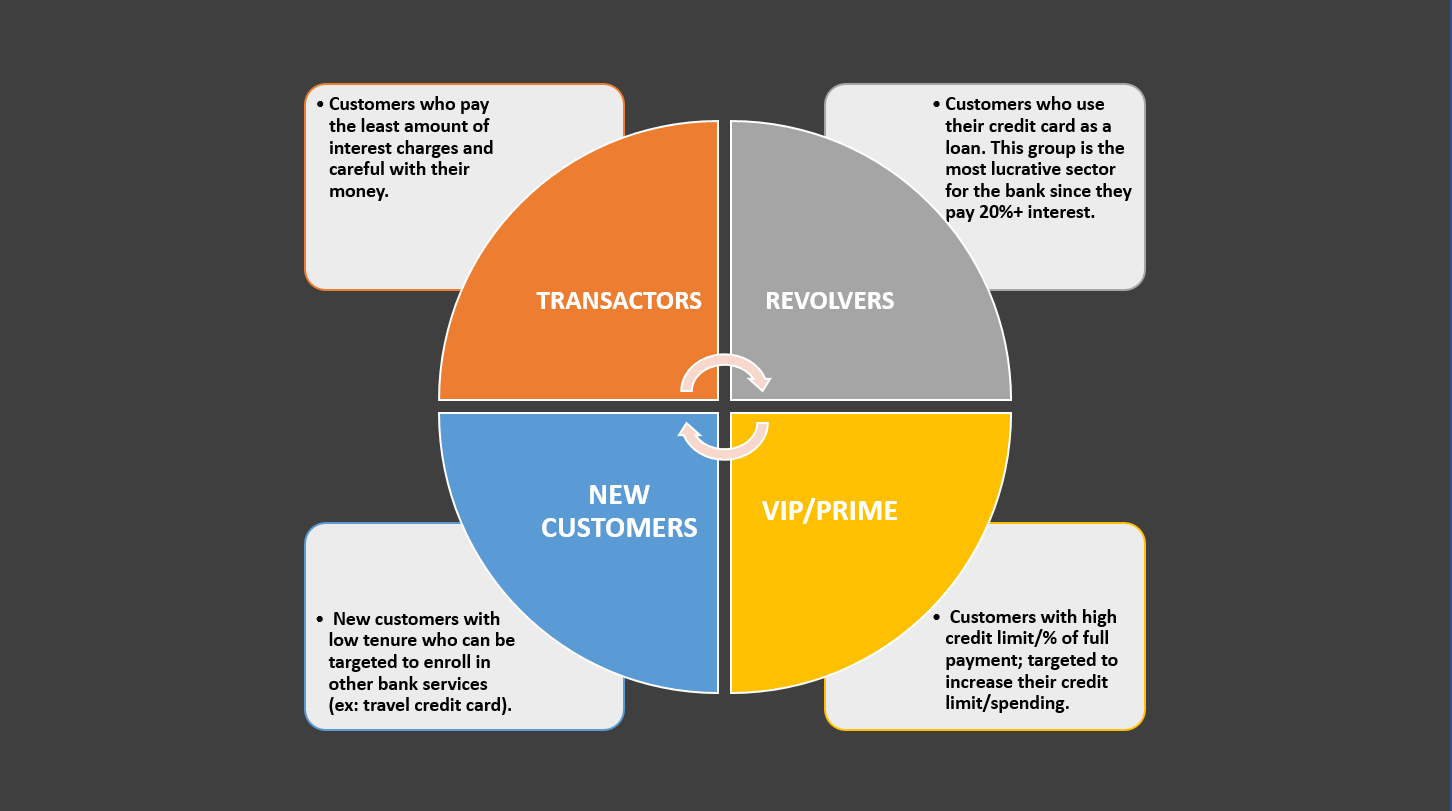

# IMPORT LIBRAIRIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('marketing_data.csv')
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure(mandat) of credit card service for user

In [3]:
creditcard_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
creditcard_df.info()
#let's apply info and get additional insights on our dataframe
# 18 features with 8950

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditcard_df.describe()
# let's apply describe() and get more statistical insights on our dataframe
# mean balance is $1564
#Balance frequency is frequently updated on average ~ 0.9
#Purchases average is $1000
# one off purchase average is ~$600
#Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
#Average credit limit ~ 4500
#percent of full payement is 15%


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Data Cleaning

In [7]:
# drop customer ID and make sure that it has been removed
creditcard_df.drop('CUST_ID',axis = 1 , inplace = True)

In [8]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYEMENT'
creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].mean(), inplace=True)


In [9]:
#fill up the missing elements with the mean of the 'CREDIT_LIMIT'
creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].mean(), inplace=True)


In [10]:
#double check that no missing values are present
creditcard_df['CREDIT_LIMIT'].isnull().sum()

0

In [11]:
#let s see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [12]:
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

# UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS

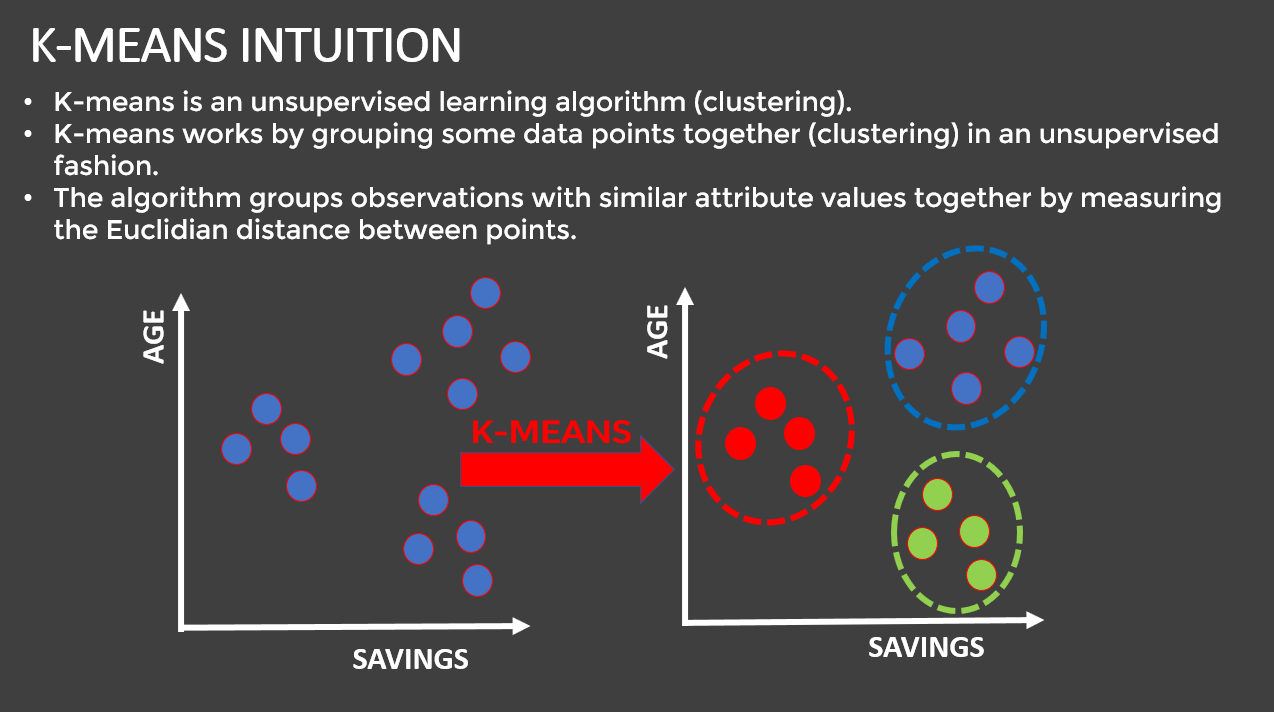

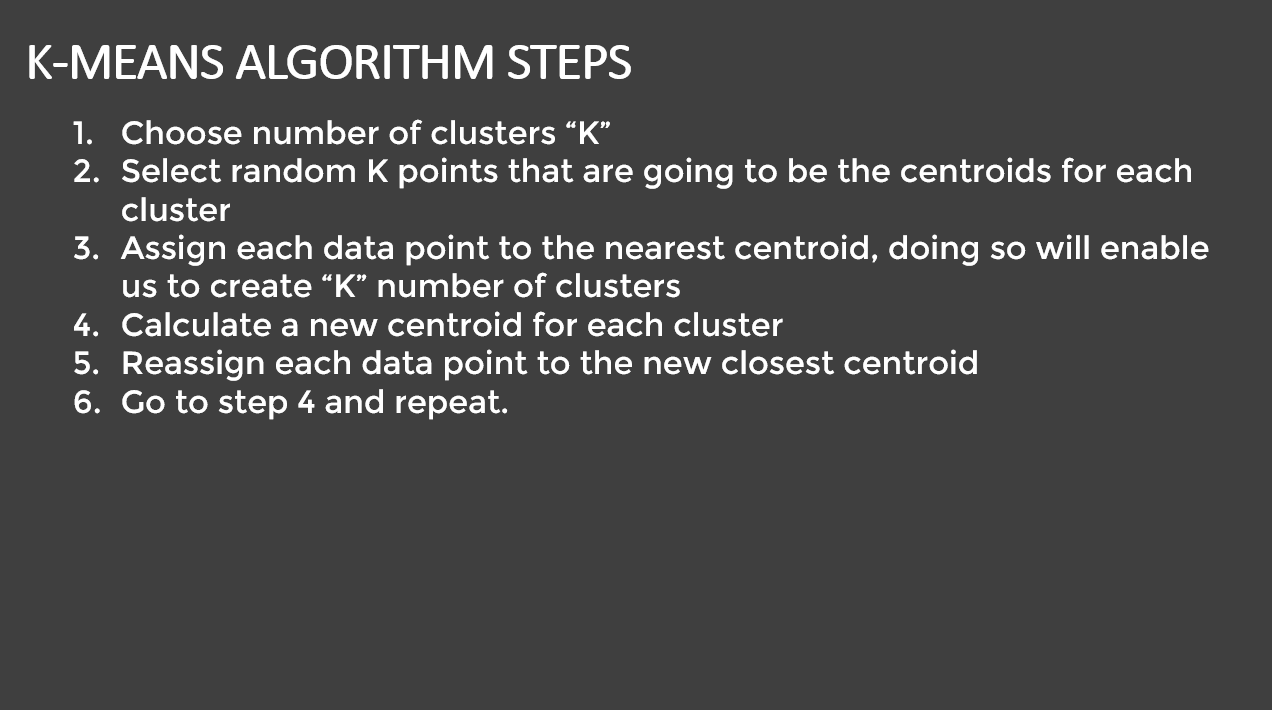

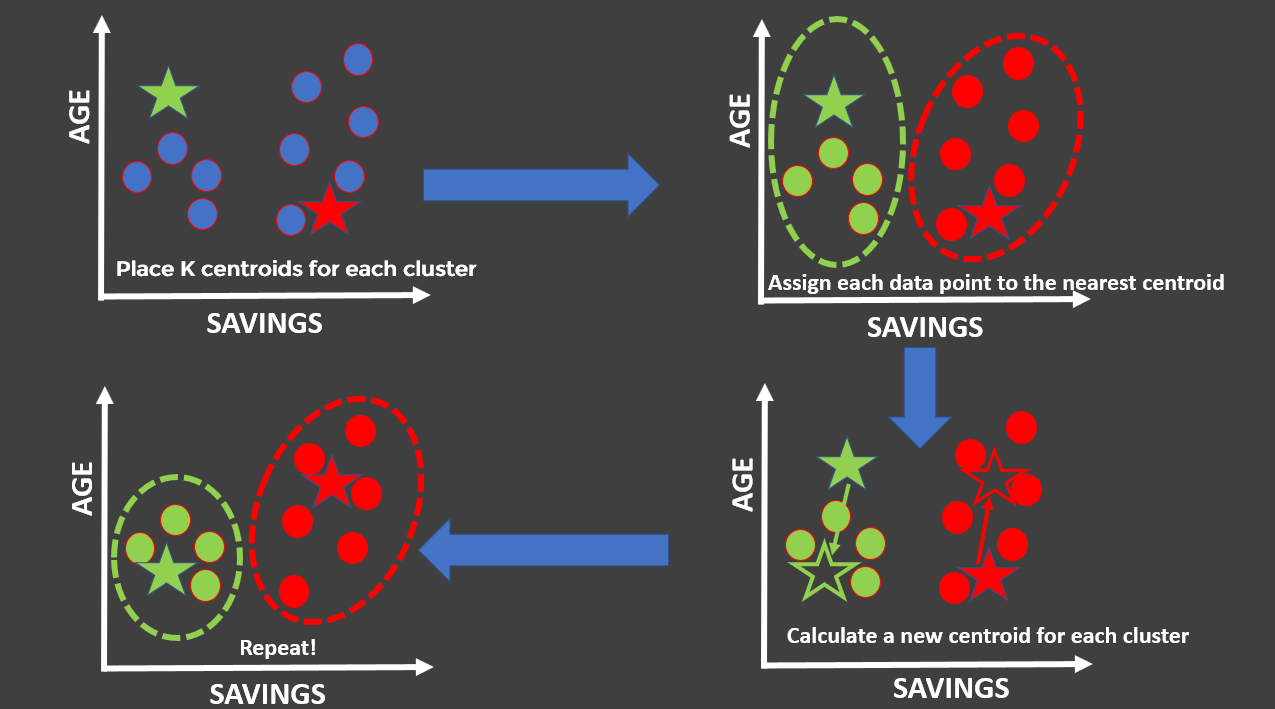

***RQ: K-means terminates after a fixed number of iterations is reached or when the centroid locations do not change between iterations***

# **TASK #5: LEARN HOW TO OBTAIN THE OPTIMAL NUMBER OF CLUSTERS(ELBOW METHOD)**

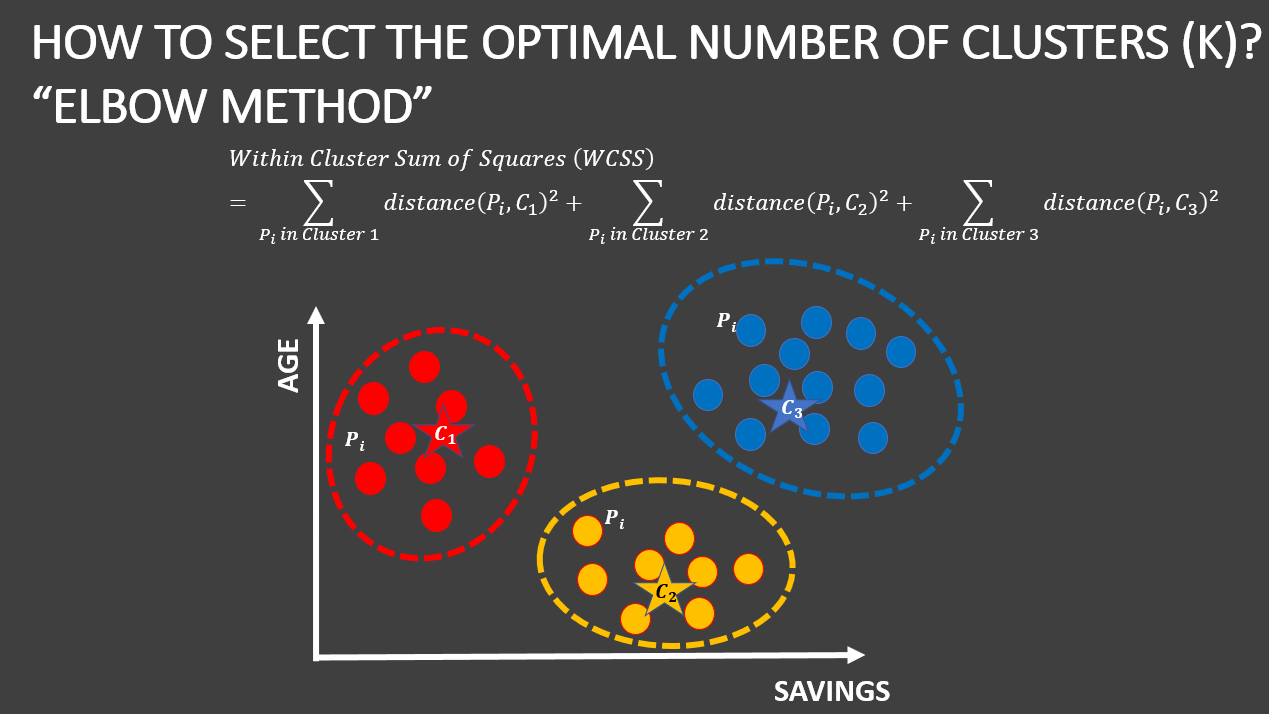

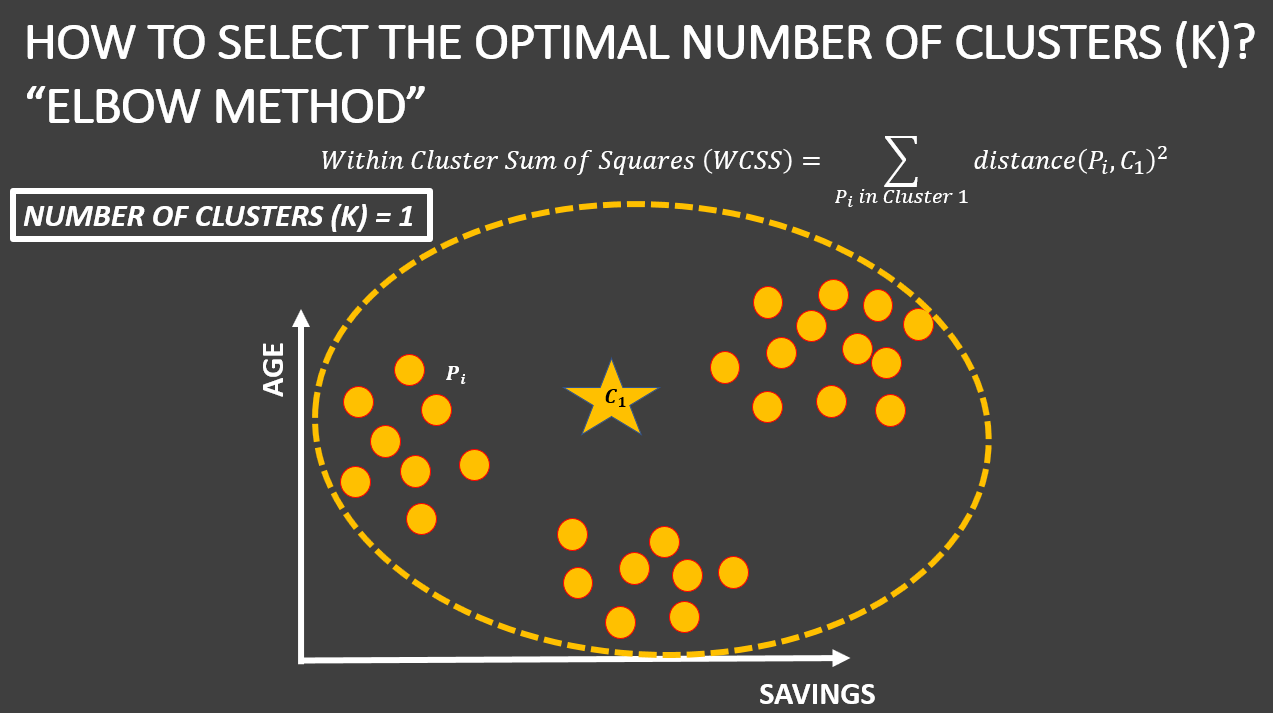

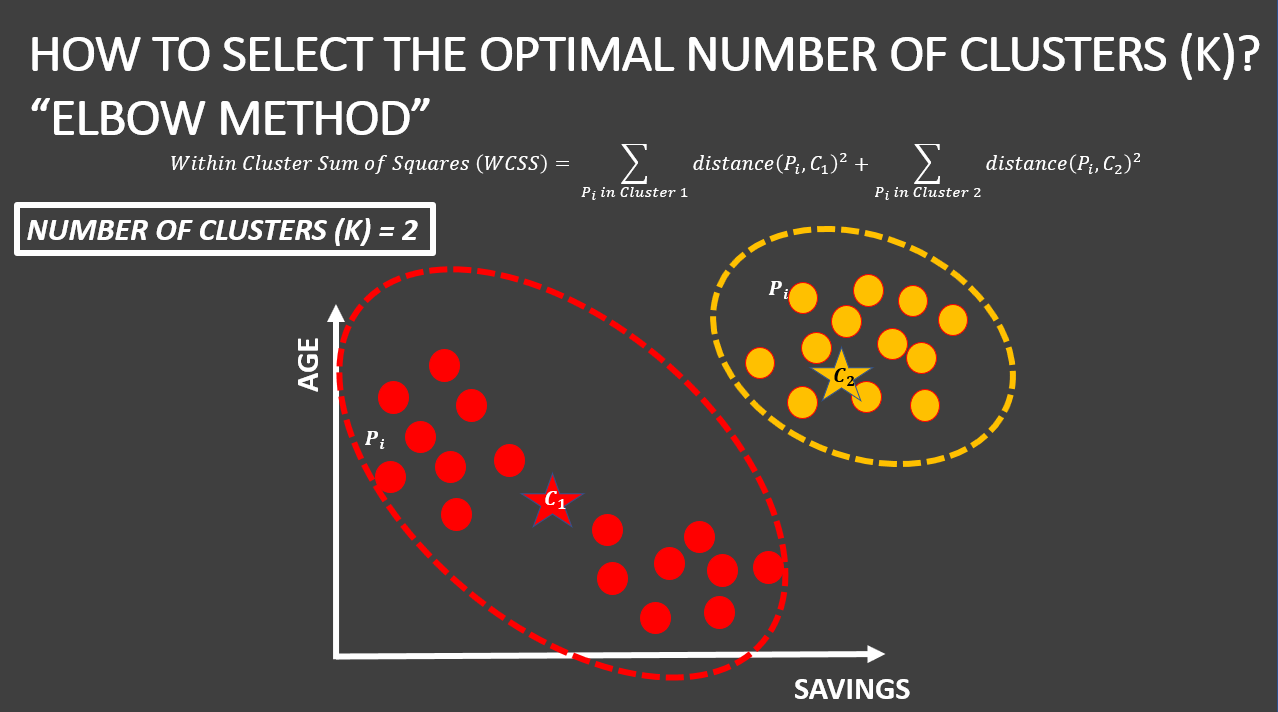

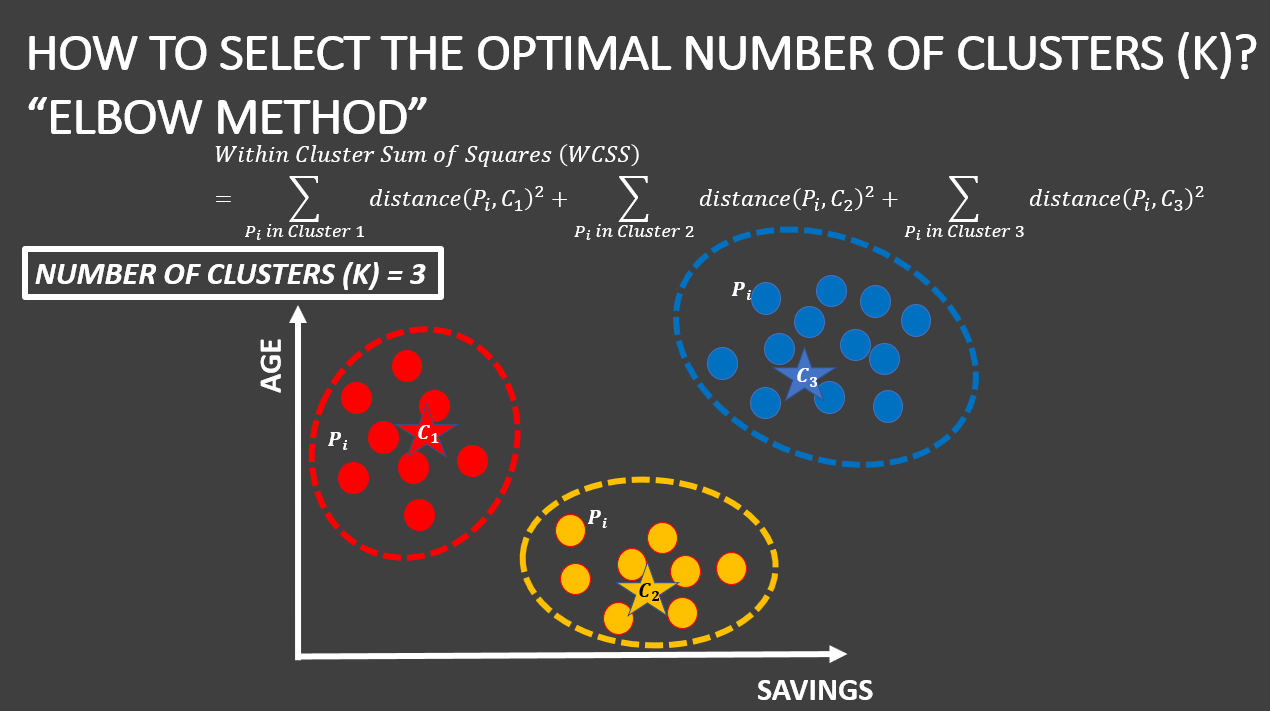

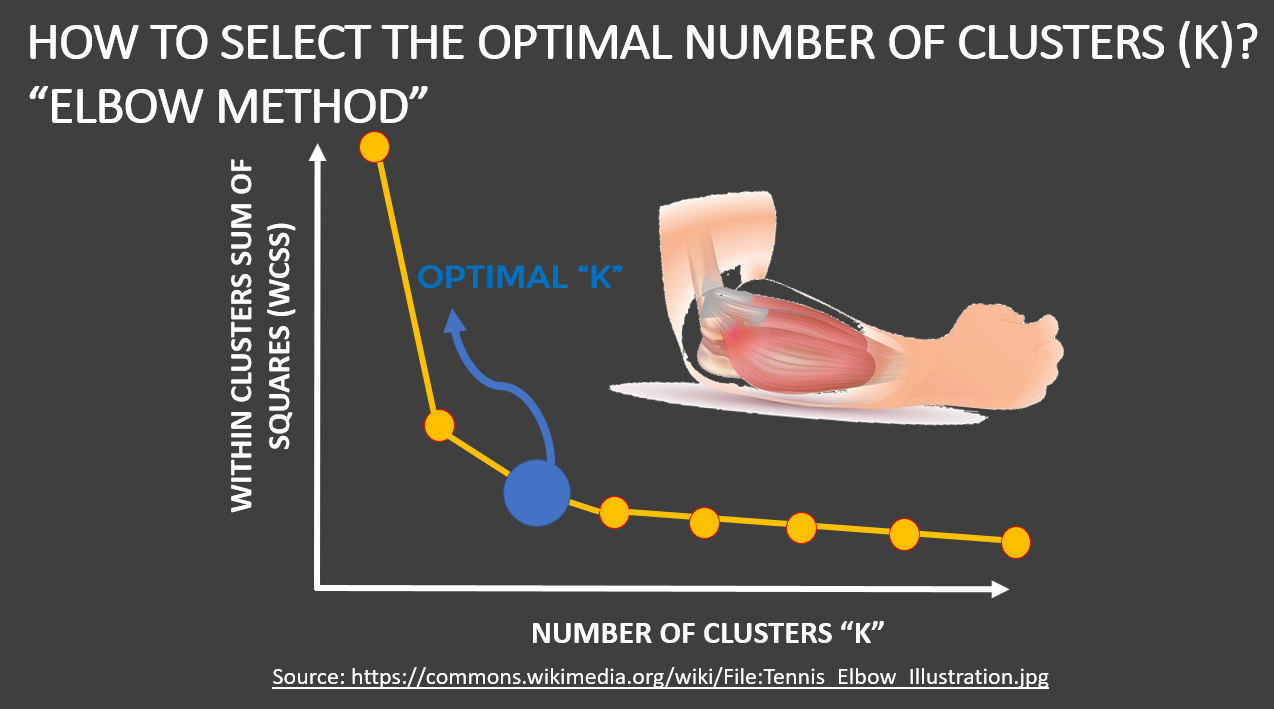

# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD


*   The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
*   if the line chart looks like an arm then the "elbow" on the arm is the value of k that is the best



In [14]:
# let's scale the data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [15]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [16]:
from yellowbrick.cluster import KElbowVisualizer

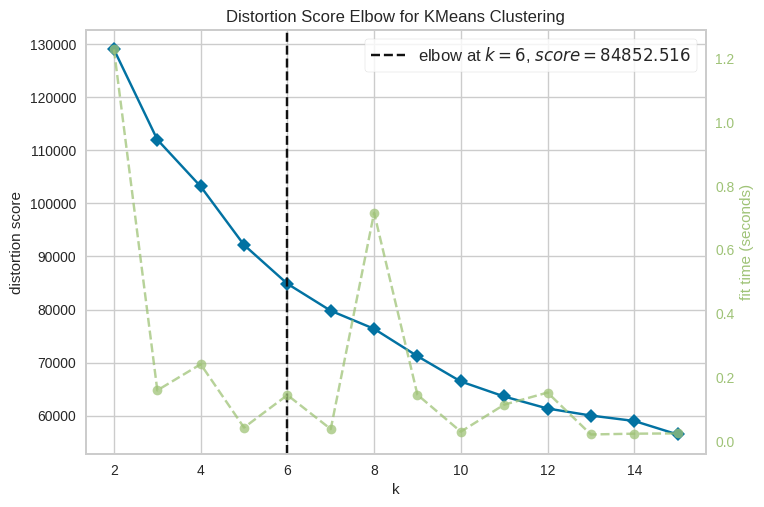

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,16))

visualizer.fit(creditcard_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

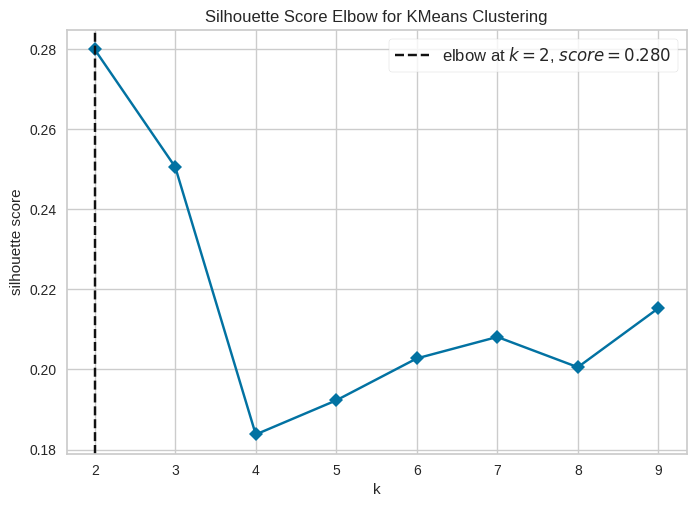

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [18]:
# Instantiate the clustering model and visualizer
#model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(creditcard_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# **TASK #7: APPLY K-MEANS METHOD**

In [19]:
kmeans = KMeans(3)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_#labels associated to each data point

In [20]:
labels

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [20]:
kmeans.cluster_centers_

array([[ 0.17532703, -0.1326135 , -0.35284187, -0.23616828, -0.40032918,
         0.2839006 , -0.85881236, -0.39555993, -0.76006637,  0.41695245,
         0.29800077, -0.48276202, -0.07220508, -0.07452157,  0.02776757,
        -0.38851868, -0.09079951],
       [-0.36139882,  0.08415771,  0.03435331, -0.04780418,  0.1689799 ,
        -0.37099357,  0.82188582,  0.2072523 ,  0.71771109, -0.48081101,
        -0.36606431,  0.18221489, -0.12821027, -0.17993349, -0.11070067,
         0.39974463,  0.05763493],
       [ 1.07519419,  0.4625928 ,  2.50913093,  2.15686702,  1.97014657,
         0.29652258,  1.1286643 ,  1.6750103 ,  1.06413108,  0.00356112,
         0.15375527,  2.5212153 ,  1.4254581 ,  1.79224758,  0.53081813,
         0.32224323,  0.316648  ]])

In [22]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.175142         -0.132468 -0.352808        -0.236156   
1 -0.361323          0.084046  0.034414        -0.047770   
2  1.075194          0.462593  2.509131         2.156867   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.400273     0.283733           -0.858708   
1               0.169061    -0.370969            0.822198   
2               1.970147     0.296523            1.128664   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.395561                        -0.759961   
1                   0.207408                         0.717970   
2                   1.675010                         1.064131   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.416709         0.297828     -0.482697    -0.072219   
1              -0.480761        -0.366036      0.182310    -0.128208   
2               0.003561         0.153755      2.521215     1.425458   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.074615         0.027691        -0.388549 -0.090699  
1 -0.179853        -0.110648         0.399982  0.057557  
2  1.792248         0.530818         0.322243  0.316648

In [23]:
#to understand what these numbers mean,let 's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

#First Custmers cluster (Transactors): they pay least amount of interest charges and careful with their money , Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits



BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  1929.017694          0.845890   249.424187       200.466759   
1   812.410833          0.897180  1076.731522       513.149139   
2  3802.400767          0.986855  6364.001750      4172.394870   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              49.106000  1573.872769            0.145710   
1             563.947571   200.931899            0.820338   
2            2192.646742  1600.692804            0.943338   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.084454                         0.062409   
1                   0.264332                         0.649777   
2                   0.702146                         0.787350   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.218532         5.281285      2.711800  4231.686147   
1               0.038939         0.750900     19.241388  4027.975215   
2               0.135857         4.298094     77.377816  9680.849220   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  1517.142180       928.739211         0.040071  11.395940  
1  1212.485646       606.346035         0.270703  11.594344  
2  6921.524992      2101.255793         0.247965  11.941075

In [24]:
#concatenate the labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df , pd.DataFrame({'cluster':labels})],axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

# **TASK 8: APPLY PRINCIPAL COMPENENT ANALYSIS AND VISUALIZE THE RESULTS**

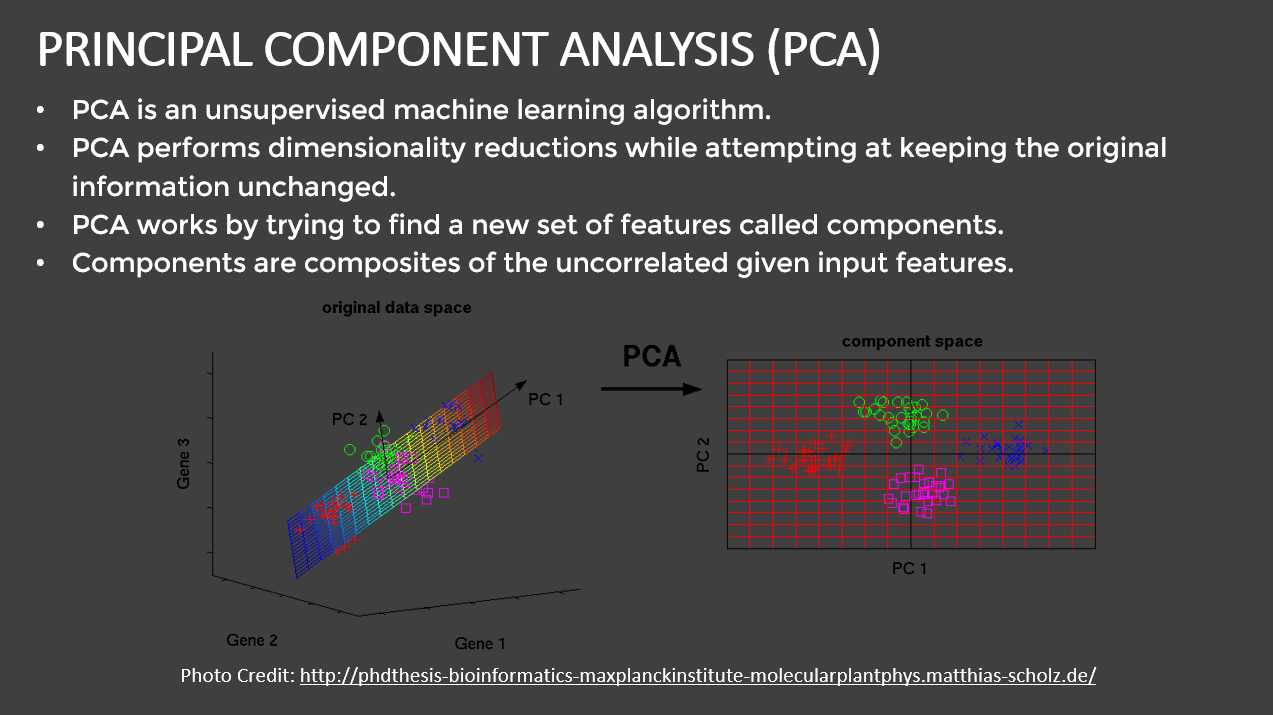

In [25]:
#obtain the principal compenent analysis (PCA)
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

In [26]:
#create a dataframe with the two components 
pca_df = pd.DataFrame(data= principal_comp, columns=['pca1' , 'pca2'])
pca_df.head()

pca1      pca2
0 -1.682223 -1.076449
1 -1.138304  2.506483
2  0.969694 -0.383524
3 -0.873633  0.043170
4 -1.599434 -0.688580

In [29]:
# concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682220 -1.076457        0
1 -1.138295  2.506486        0
2  0.969679 -0.383479        1
3 -0.873625  0.043143        0
4 -1.599434 -0.688582        0

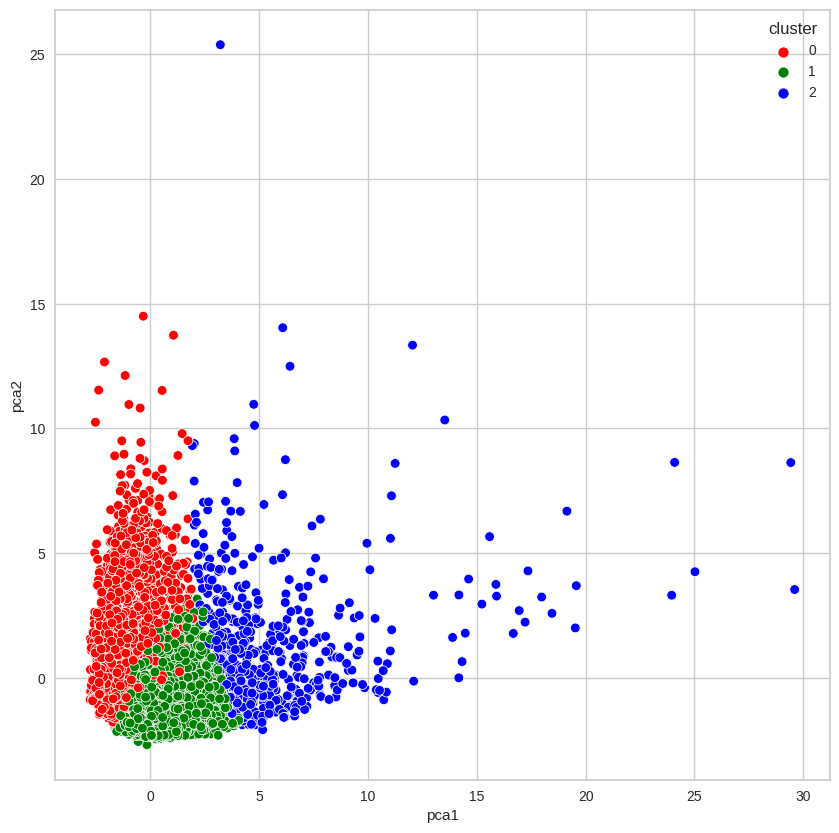

In [30]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()

In [31]:
import plotly.express as px


In [32]:
from sklearn.decomposition import PCA


pca1 = PCA(n_components=3)
components = pca1.fit_transform(creditcard_df_scaled)
total_var = pca1.explained_variance_ratio_.sum() * 100 #  quantifies the amount of information retained in the reduced-dimensional representation of the data.


In [33]:
#create a dataframe with the 3 components 
df_pca = pd.DataFrame(data= components, columns=['pca1' , 'pca2', 'pca3'])
df_pca.head()

pca1      pca2      pca3
0 -1.682219 -1.076454  0.488380
1 -1.138293  2.506466  0.601018
2  0.969681 -0.383509  0.102623
3 -0.873626  0.043159  1.459999
4 -1.599433 -0.688581  0.365006

In [34]:
# concatenate the clusters labels to the dataframe
df_pca = pd.concat([df_pca,pd.DataFrame({'cluster': labels})], axis = 1)
df_pca.head()

pca1      pca2      pca3  cluster
0 -1.682219 -1.076454  0.488380        0
1 -1.138293  2.506466  0.601018        0
2  0.969681 -0.383509  0.102623        1
3 -0.873626  0.043159  1.459999        0
4 -1.599433 -0.688581  0.365006        0

In [35]:
fig = px.scatter_3d(
    df_pca, x='pca1', y='pca2', z='pca3', color=df_pca['cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'pca1': 'pca1', 'pca2': 'pca2', 'pca3': 'pca3'}
)
fig.show()

In [36]:
pca2 = PCA()
pca2.fit(creditcard_df_scaled)
exp_var_cumul = np.cumsum(pca2.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)